<a href="https://colab.research.google.com/github/jaugustorc/Rock-Paper-Scissors/blob/main/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento de um modelo de IA para reconhecimento de gestos do jogo pedra, papel e tesoura

Neste caderno, você irá aprender como treinar um modelo de inteligência artificial capaz de reconhecer gestos do jogo pedra, papel e tesoura utilizando a biblioteca TensorFlow em Python.

O jogo de pedra, papel e tesoura é um jogo popular em todo o mundo e pode ser um desafio para a inteligência artificial devido à sua natureza imprevisível e variada. No entanto, com o treinamento apropriado, um modelo de IA pode aprender a identificar os gestos da mão e prever qual jogada o jogador humano está fazendo.

O modelo que iremos construir é baseado em uma rede neural convolucional (CNN), que é uma arquitetura de rede neural bem adequada para a tarefa de classificação de imagens. O conjunto de dados utilizado no treinamento do modelo consiste em imagens de gestos da mão nas três classes: pedra, papel e tesoura.

O resultado final será um modelo de IA capaz de reconhecer os gestos da mão e prever qual jogada o jogador humano está fazendo no jogo pedra, papel e tesoura.

Vamos começar!


## Importação das bibliotecas

In [1]:
!pip install --upgrade tensorflow-datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from sklearn.model_selection import train_test_split
import tensorflow_datasets.public_api as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob

# O dataset Rock Paper Scissors

O conjunto de dados utilizado neste projeto é o "Rock Paper Scissors" disponível no Kaggle. O conjunto de dados contém um total de 2188 imagens de gestos de mãos dos jogos de pedra, papel e tesoura. As imagens foram capturadas como parte de um projeto pessoal em que o autor desenvolveu um jogo de pedra, papel e tesoura usando visão computacional e aprendizado de máquina no Raspberry Pi (https://github.com/DrGFreeman/rps-cv).

O conjunto de dados consiste em imagens RGB de 300 pixels de largura por 200 pixels de altura no formato .png. As imagens estão separadas em três subpastas nomeadas 'rock', 'paper' e 'scissors' de acordo com sua classe correspondente. Há um total de 726 imagens de 'Rock', 710 imagens de 'Paper' e 752 imagens de 'Scissors'. Todas as imagens são capturadas em um fundo verde com iluminação relativamente consistente e balanço de branco.

Este conjunto de dados é adequado para tarefas de classificação de imagens usando aprendizado de máquina. É uma excelente opção para um projeto de jogo de pedra, papel e tesoura, onde o objetivo é treinar um modelo que possa reconhecer o gesto feito pelo jogador por meio da webcam e, em seguida, jogar contra o jogador fazendo uma escolha aleatória. O autor disponibilizou este conjunto de dados sob a licença CC-BY-SA 4.0.

Link:  https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors?resource=download

## Nova seção

In [3]:
import os
data_directory='/content/drive/MyDrive/dados - rock_paper_scissors'
for dirname, _, filenames in os.walk(data_directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break
    break

print(os.listdir(data_directory))

/content/drive/MyDrive/dados - rock_paper_scissors/README_rpc-cv-images.txt
['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']


In [4]:
labels = ['paper','scissors','rock']
nb = len(labels)

In [5]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
import random

In [6]:
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            img=load_img(os.path.join(folder,image), target_size=(150,150))
            img=img_to_array(img)
            img=img/255.0
            dataset.append((img,count))
        print(f'\rCompleted: {label}',end='')
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

Completed: rock

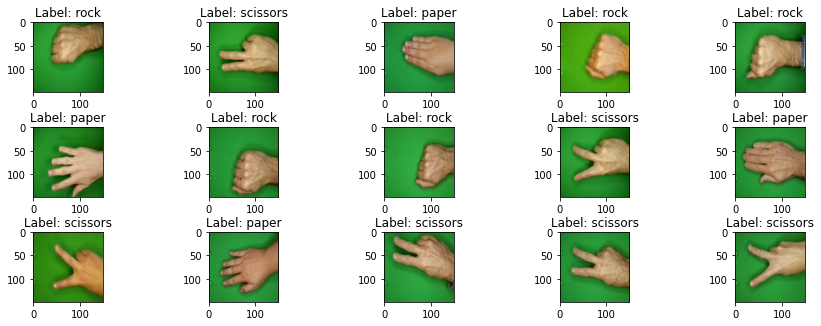

In [7]:
import matplotlib.pyplot as plt

X, y = input_target_split(data_directory,labels)
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [8]:
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([712, 750, 726]))

In [9]:
batch=32
size=(150,150)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.1)  # val 20%
#val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)


train_data = train_datagen.flow_from_directory(data_directory, 
                                               target_size=size, 
                                               color_mode='rgb',
                                               batch_size=batch, 
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset = 'training') 

val_data = train_datagen.flow_from_directory(data_directory, 
                                           target_size=size, 
                                           color_mode='rgb',
                                           batch_size=batch, 
                                           class_mode='categorical',
                                           shuffle=False,
                                           subset = 'validation')                                   

Found 1970 images belonging to 3 classes.
Found 218 images belonging to 3 classes.


# Modelo

In [10]:
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D

def model_rnn():
  model = Sequential()
  model.add(Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(32, (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(2, 2))
  model.add(Flatten())
  model.add(Dense(units=512, activation='relu'))
  model.add(Dense(units=3, activation='softmax'))
  return model # Retornamos a função Model com toda a estrutura da nossa rede neural.

In [ ]:
model = model_rnn()
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
fill_in=1970/50
model.fit(train_data,steps_per_epoch=fill_in,
                    validation_data=val_data,
                    validation_steps=fill_in, 
                    epochs=50)

/usr/local/lib/python3.9/dist-packages/tensorflow/python/keras/engine/training.py:1961: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
39/39 [==============================] - 59s 1s/step - loss: 1.4923 - accuracy: 0.3945 - val_loss: 1.0921 - val_accuracy: 0.3432
Epoch 2/50
39/39 [==============================] - 52s 1s/step - loss: 1.0041 - accuracy: 0.5008 - val_loss: 0.9479 - val_accuracy: 0.5611
Epoch 3/50
39/39 [==============================] - 53s 1s/step - loss: 0.9340 - accuracy: 0.5656 - val_loss: 0.8693 - val_accuracy: 0.6527
Epoch 4/50
39/39 [==============================] - 58s 1s/step - loss: 0.7560 - accuracy: 0.6864 - val_loss: 0.6767 - val_accuracy: 0.7315
Epoch 5/50
39/39 [==============================] - 51s 1s/step - loss: 0.5549 - accuracy: 0.7867 - val_loss: 0.5446 - val_accuracy: 0.7942
Epoch 6/50
 2/39 [>.............................] - ETA: 52s - loss: 0.4241 - accuracy: 0.7656

# Treinamento

In [ ]:


model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

EPOCHS = 50
history = model.fit(train_data, validation_data = val_data, epochs = EPOCHS,batch_size=batch)

test_loss, test_accuracy = model.evaluate(val_data)
print(f'Loss: {test_loss}, accuracy: {test_accuracy}')

Epoch 1/50
  13069/Unknown - 14393s 1s/step - loss: 0.0617 - accuracy: 0.9786

In [ ]:
#model_saved = tf.keras.models.load_model('model_cnn_final.h5')
model.save('/content/drive/MyDrive/model_rock_paper_scissors')